# Housing Price Prediction

2/11/22

Max Rivera

Dataset from https://www.kaggle.com/shivachandel/kc-house-data

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Exploratory Data Analysis

In [2]:
# load data 
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Price is the label, so let's look at the distribution of prices. 

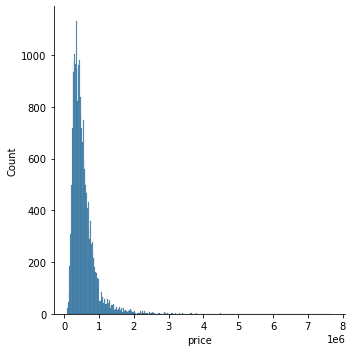

In [3]:
sns.displot(df['price'])

Most of the houses are under 1 million dollars, with some outliers that are more expensive.

Let's see how well each feature correlates with the labels. 

<AxesSubplot:>

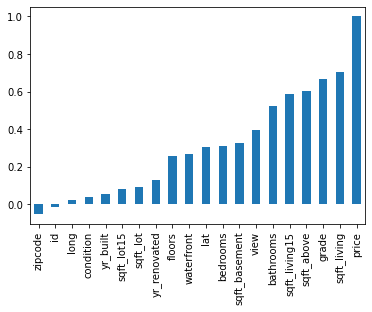

In [4]:
df.corr()['price'].sort_values().plot(kind='bar')

A few features such as zipcode, id, long, condition don't have much correlation with the output. These features might need to be removed during feature selection. 

Let's look at Longitude and Latitude. 

<AxesSubplot:xlabel='long', ylabel='lat'>

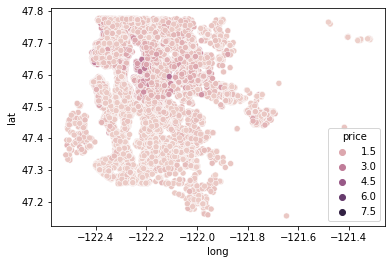

In [5]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

## Feature Engineering/Selection

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

id does not encode any meaningful information, and has a very low correlation, so it can be removed.

In [8]:
df = df.drop('id',axis=1)

Zipcode does not encode any numerically valuable information. It can be used as a categorical variable is there aren't too many categories to keep track of. 

In [9]:
len(np.unique(df['zipcode'].values))

70

There are 70 unique zip codes. I'm not sure how to effectively use that many categorical variables, so I will discard them. 

In [10]:
df = df.drop('zipcode',axis=1)

Next, the date should be formatted in a more useful way. This column can be reformatted into a datetime object, which makes it easier to extract features. 

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

A new column can be created with just the year.

In [12]:
df['year'] = df['date'].apply(lambda date: date.year)
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: int64

And for the month and day...

In [13]:
df['month'] = df['date'].apply(lambda date: date.month)
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21613, dtype: int64

In [14]:
df['day'] = df['date'].apply(lambda date: date.day)
df['day']

0        13
1         9
2        25
3         9
4        18
         ..
21608    21
21609    23
21610    23
21611    16
21612    15
Name: day, Length: 21613, dtype: int64

Now the date column can be removed.

In [15]:
df = df.drop('date',1)
df

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,47.5107,-122.362,1830,7200,2015,2,23
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,47.5944,-122.299,1020,2007,2014,6,23
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,47.5345,-122.069,1410,1287,2015,1,16


The yr_built does not need to be modified. Numerically, it is already in order. Ealier years will be smaller than more recent years. The yr_renovated feature also does not need to be modified. Because a larger yr_renovated means a newer house, and a yr_renovated of 0 means an older house, the feature is already numerically in order. 

All of the other features can be kept the way they are. 

## Train Test Split

For smaller datasets, a 70-30 train test split is common. When defining X and y, it's important to use '.values' at the end to convert each dataframe into a numpy array, or else it will be left as a pandas series or dataframe, which will cause errors down the line because numpy arrays are needed as input to the training function.

In [16]:
y = df['price'].values
print(type(y))
X = df.drop('price',axis=1).values
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=101)

## Normalization

It's important to make sure features are on the same scale, in order for the algorithm to learn efficiently. This can be done by initializing a MinMaxScaler and fitting it on the training data only. If it is fit on the test data, we won't be able to achieve an unbiased evaluation after training. Once fitted on the training data, the scaler can be applied to both test and train data.

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_train.max(), X_train.min()

(1.0000000000000002, 0.0)

The training data is now scaled between 0 and 1. 

## Initialize Model

Since there are 20 features, the first layer will start with 20 and decrease by a factor of 2 on every layer. This is arbitrary, but the number of neurons typically decreases towards the output layer. Since this is a regression problem, the output layer will have a linear activation.  

In [23]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

## Train Model

In [24]:
X_train.shape

(15129, 20)

On smaller datasets (<2000 samples), batch gradient descent is fine. However, this dataset has 15,129 samples, so mini-batch gradient descent would be more efficient. Typically batch sizes are chosen in powers of 2, because those sizes run more efficiently, so let's go with 128. And let's try 400 epochs.

In [25]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128, epochs=400)

2022-02-12 23:13:27.025990: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-12 23:13:27.026474: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 15129 samples, validate on 6484 samples
Epoch 1/400
15129/15129 [==============================] - 1s 57us/sample - loss: 423635566649.3965 - val_loss: 433074359326.9537
Epoch 2/400
15129/15129 [==============================] - 0s 13us/sample - loss: 423608298447.0641 - val_loss: 433015203404.1209
Epoch 3/400
15129/15129 [==============================] - 0s 13us/sample - loss: 423487790861.9600 - val_loss: 432809441710.8254
Epoch 4/400
15129/15129 [==============================] - 0s 14us/sample - loss: 423152049671.8853 - val_loss: 432304280438.9192
Epoch 5/400
15129/15129 [==============================] - 0s 15us/sample - loss: 422422127830.3571 - val_loss: 431292423519.8618
Epoch 6/400
15129/15129 [==============================] - 0s 15us/sample - loss: 421073565180.6496 - val_loss: 429542263131.4398
Epoch 7/400
15129/15129 [==============================] - 0s 16us/sample - loss: 418879607645.7601 - val_loss: 426814465925.4485
Epoch 8/400
15129/15129 [================

15129/15129 [==============================] - 0s 14us/sample - loss: 90152047469.7336 - val_loss: 94400001174.9784
Epoch 64/400
15129/15129 [==============================] - 0s 13us/sample - loss: 89663064223.0588 - val_loss: 93888408136.9624
Epoch 65/400
15129/15129 [==============================] - 0s 13us/sample - loss: 89178723336.8667 - val_loss: 93359012543.7236
Epoch 66/400
15129/15129 [==============================] - 0s 13us/sample - loss: 88679819008.0169 - val_loss: 92822141773.2264
Epoch 67/400
15129/15129 [==============================] - 0s 13us/sample - loss: 88173500665.3500 - val_loss: 92275689041.1746
Epoch 68/400
15129/15129 [==============================] - 0s 13us/sample - loss: 87670955495.9381 - val_loss: 91739963290.9266
Epoch 69/400
15129/15129 [==============================] - 0s 13us/sample - loss: 87160015374.7214 - val_loss: 91182980538.8279
Epoch 70/400
15129/15129 [==============================] - 0s 14us/sample - loss: 86645292917.6527 - val_loss

15129/15129 [==============================] - 0s 14us/sample - loss: 56659699405.9303 - val_loss: 57795916107.0154
Epoch 127/400
15129/15129 [==============================] - 0s 14us/sample - loss: 56332499579.4228 - val_loss: 57440096480.8883
Epoch 128/400
15129/15129 [==============================] - 0s 13us/sample - loss: 56029379831.2518 - val_loss: 57091299197.8680
Epoch 129/400
15129/15129 [==============================] - 0s 13us/sample - loss: 55739305992.2575 - val_loss: 56777689675.4892
Epoch 130/400
15129/15129 [==============================] - 0s 13us/sample - loss: 55467298871.2306 - val_loss: 56466348255.6249
Epoch 131/400
15129/15129 [==============================] - 0s 13us/sample - loss: 55202519586.6883 - val_loss: 56153110951.2449
Epoch 132/400
15129/15129 [==============================] - 0s 13us/sample - loss: 54940106511.5844 - val_loss: 55873622491.0450
Epoch 133/400
15129/15129 [==============================] - 0s 13us/sample - loss: 54698975591.2697 - v

15129/15129 [==============================] - 0s 13us/sample - loss: 47504733413.7891 - val_loss: 47822877301.1820
Epoch 190/400
15129/15129 [==============================] - 0s 13us/sample - loss: 47430615380.5888 - val_loss: 47740445889.9346
Epoch 191/400
15129/15129 [==============================] - 0s 13us/sample - loss: 47352464267.0410 - val_loss: 47663099646.2628
Epoch 192/400
15129/15129 [==============================] - 0s 13us/sample - loss: 47280884926.3967 - val_loss: 47579269995.5484
Epoch 193/400
15129/15129 [==============================] - 0s 13us/sample - loss: 47214355628.6634 - val_loss: 47504612233.8705
Epoch 194/400
15129/15129 [==============================] - 0s 13us/sample - loss: 47130622915.1516 - val_loss: 47435487051.3313
Epoch 195/400
15129/15129 [==============================] - 0s 13us/sample - loss: 47061000932.1986 - val_loss: 47363753919.5657
Epoch 196/400
15129/15129 [==============================] - 0s 13us/sample - loss: 46993850394.9385 - v

15129/15129 [==============================] - 0s 13us/sample - loss: 43634601522.9326 - val_loss: 43863000470.1888
Epoch 253/400
15129/15129 [==============================] - 0s 14us/sample - loss: 43581585919.9662 - val_loss: 43807713192.8242
Epoch 254/400
15129/15129 [==============================] - 0s 13us/sample - loss: 43542760099.8982 - val_loss: 43765969105.7273
Epoch 255/400
15129/15129 [==============================] - 0s 13us/sample - loss: 43497884146.1585 - val_loss: 43717182908.0913
Epoch 256/400
15129/15129 [==============================] - 0s 13us/sample - loss: 43443119715.2594 - val_loss: 43661502672.4639
Epoch 257/400
15129/15129 [==============================] - 0s 13us/sample - loss: 43395401442.2357 - val_loss: 43612270655.1709
Epoch 258/400
15129/15129 [==============================] - 0s 13us/sample - loss: 43349121625.4452 - val_loss: 43569793373.9667
Epoch 259/400
15129/15129 [==============================] - 0s 13us/sample - loss: 43300492189.4512 - v

15129/15129 [==============================] - 0s 13us/sample - loss: 41019372259.2510 - val_loss: 41121108859.9729
Epoch 316/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40999174279.0307 - val_loss: 41089514193.4115
Epoch 317/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40960358491.6449 - val_loss: 41057939819.8643
Epoch 318/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40926043531.3456 - val_loss: 41026761681.8853
Epoch 319/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40904560165.6665 - val_loss: 40994293303.9062
Epoch 320/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40875914297.0581 - val_loss: 40971866058.9365
Epoch 321/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40840542599.6230 - val_loss: 40931915565.0093
Epoch 322/400
15129/15129 [==============================] - 0s 13us/sample - loss: 40822985125.6749 - v

15129/15129 [==============================] - 0s 13us/sample - loss: 38883944041.2157 - val_loss: 38809820793.6040
Epoch 379/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38840578535.8704 - val_loss: 38756478708.1555
Epoch 380/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38802574874.0247 - val_loss: 38708742741.5965
Epoch 381/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38769482972.9902 - val_loss: 38662739839.1314
Epoch 382/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38719369183.5114 - val_loss: 38622802358.4059
Epoch 383/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38675934713.8069 - val_loss: 38573412892.7428
Epoch 384/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38635633558.2090 - val_loss: 38527571533.3843
Epoch 385/400
15129/15129 [==============================] - 0s 13us/sample - loss: 38588287675.1817 - v

The model losses during training can be viewed with 'model.history.history'.

<AxesSubplot:>

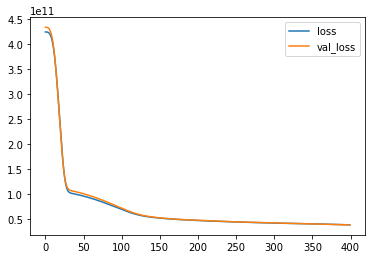

In [28]:
loss=pd.DataFrame(model.history.history)
loss.plot()

Both validation and training loss appear very low.

## Model Evaluation

Since this is a regression problem, mean squared error is used as an evaluation metric. The next step is to predict on the test set. 

In [30]:
predictions = model.predict(X_test)

In [33]:
mse = mean_squared_error(predictions,y_test)
mse

37805096693.92787

This number is hard to interpret, so we can calculate root mean squared error, or mean absolute error.

In [35]:
np.sqrt(mse)

194435.32779288816

In [37]:
mean_absolute_error(predictions,y_test)

119015.44082521311

So on average, this model is off on price by about $120,000 dollars. To better understand this, the context (mean price of a house) needs to be used as a comparison. 

In [40]:
np.mean(df['price'])

540088.1417665294

In [41]:
120000/540000

0.2222222222222222

The model is off by about 20%. This isn't great. 

In [42]:
train_predictions = model.predict(X_train)

In [43]:
mean_absolute_error(train_predictions,y_train)

119229.28743211928

The mean absolute error in training is around 120000. Since training and validation error around the same value, and the error is not great, this model could be further improved by reduxing the bias. Common ways to reduce bias are to create a bigger network, use more iterations of gradient descent, or do a neural network architecture search for architectures that may be more suited for this particular application.